<a href="https://colab.research.google.com/github/AnaliaLeyez/AnaliaLeyez/blob/main/U5_Intro_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Matplotlib

Basado en libro: Capitulo 4 - Python Data Science Handbook - Jakes VanderPlas

https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html



En ciencia de datos, visualizar la información es tan importante como analizarla.
Un buen gráfico puede revelar patrones, comparaciones o anomalías que serían difíciles de detectar solo con números.

Matplotlib es la biblioteca base de visualización en Python:

* Permite gráficos simples o complejos

* Es personalizable ya que podemos editar colores, estilos, tipografías, ejes, anotaciones, etc.

* Es la base de otras librerías más como Seaborn o Plotly.

# 1) Importamos librerias necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as mpl

# Permite que los gráficos se muestren dentro del notebook (Colab o Jupyter)
%matplotlib inline

# Importaciones de Matplotlib

## Opcion 1: import matplotlib.pyplot as plt

Es la forma más usada y práctica, importa solo el módulo pyplot de Matplotlib, que ofrece funciones sencillas para crear gráficos, como:
* plt.plot(): Dibuja líneas o curvas continuas. Se usa para representar relaciones entre dos variables (x e y).
* plt.bar(): Crea gráficos de barras verticales. Cada barra representa una categoría o grupo.
* plt.hist(): Genera un histograma, dividiendo los datos numéricos en rangos (bins).
* plt.show(): Muestra la figura en pantalla.
Es ideal para el uso cotidiano y para notebooks (Jupyter o Colab).



## Opción 2: import matplotlib as mpl

Importa toda la librería completa, no solo pyplot.
Esto incluye submódulos como:

* mpl.pyplot: Contiene las funciones principales para crear gráficos

* mpl.colors: Permite definir, convertir y manipular colores dentro de Matplotlib.

* mpl.cm : Contiene los mapas de color (colormaps) predefinidos.

* mpl.ticker: Controla el formato y la frecuencia de los ticks (marcas de los ejes).

* mpl.rcParams: Diccionario global con las configuraciones de estilo de Matplotlib.

Se usa cuando se necesita personalizar profundamente Matplotlib o cambiar configuraciones a bajo nivel.

# configurar plt.rcParams (ajustes visuales por defecto)
Permite fijar un estilo visual uniforme  para todas las figuras del notebook sin tener que repetir los mismos ajustes cada vez que graficamos.
*plt.rcParams* es un diccionario de configuración global. Todo gráfico creado después hereda estos valores.

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)  # Tamaño estándar de las figuras (ancho x alto en pulgadas)
plt.rcParams["axes.grid"] = True #False         # Activa una grilla de fondo en los ejes por defecto
plt.rcParams["font.size"] = 11           # Define el tamaño de fuente por defecto para textos y etiquetas

# 2. Interfaces de Matplotlib:
Matplotlib se puede usar de dos formas,
basada en estado y orientada a objetos.

## 2.1 Interfaz basada en estado (estilo MATLAB / pyplot)

Trabaja con figura y ejes implícitos, sin que haya que crearlos explícitamente.
Matplotlib tiene un “modo automático” que mantiene en memoria una figura y unos ejes activos, por lo que en cada llamada a plt.plot, plt.title, etc., actualiza la figura y los ejes actuales.

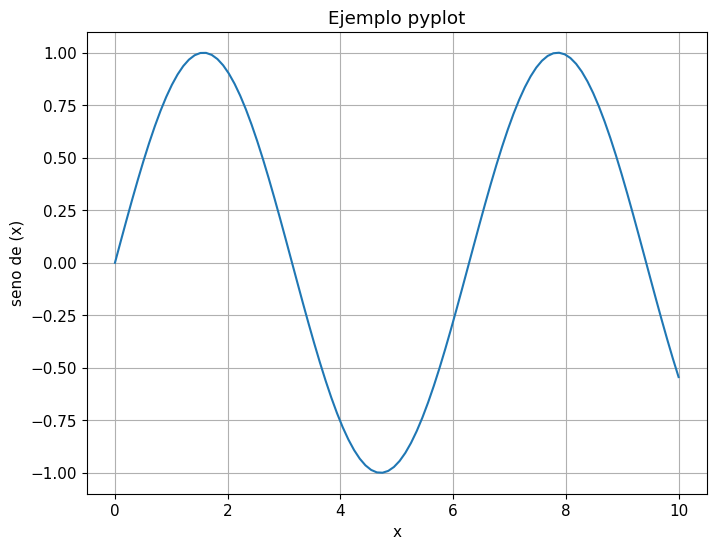

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)           # Dibuja la línea en la figura actual
plt.title("Ejemplo pyplot")
plt.xlabel("x")
plt.ylabel("seno de (x)")
plt.show()

No creamos ni **fig**(La figura completa,donde van uno o varios gráficos.) ni **ax** (Los ejes de coordenadas dentro de la figura, el “recuadro” donde efectivamente se dibujan los datos.), Matplotlib lo hizo “por detrás”.
Internamente:

plt.gcf() = Get Current Figure → devuelve la figura activa

plt.gca() = Get Current Axes → devuelve los ejes activos


Si bien esta opcion es más corta y fácil de escribir e ideal para explorar datos rápidamente en un notebook o consola.Si se hacen muchos gráficos seguidos, Matplotlib puede confundir qué figura o eje está activo, y los gráficos pueden encimarse.


### Comprobar

Figure(800x600)
Axes(0.125,0.11;0.775x0.77)


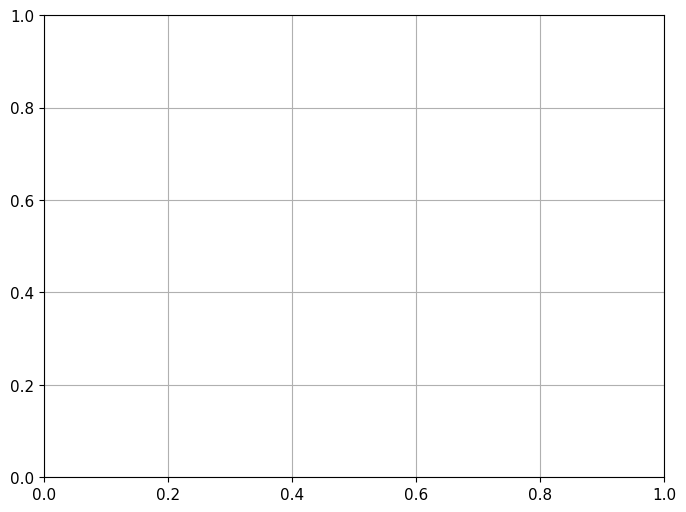

In [ ]:
print(plt.gcf())  # muestra la figura actual
print(plt.gca())  # muestra los ejes actuales

## 2.2 Interfaz orientada a objetos (OO API)

Debemos crear explícitamente Figure (lienzo) y Axes (área de dibujo) y operamos sobre ellos, en lugar de dejar que Matplotlib maneje el estado automáticamente.

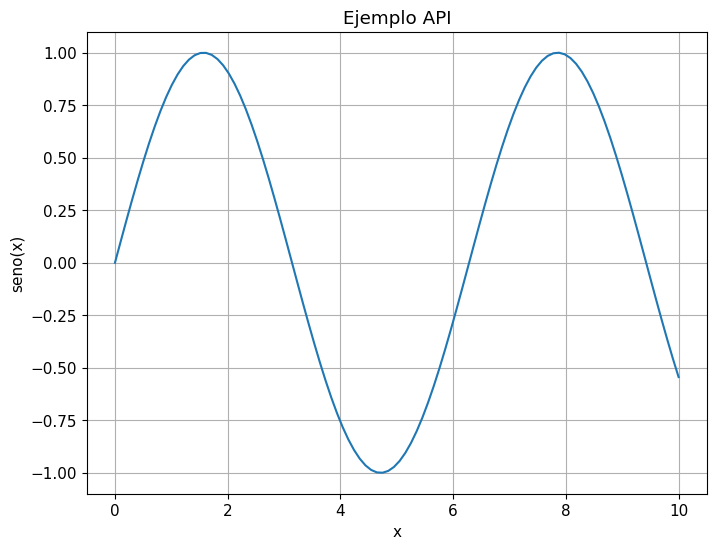

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()       # Creamos figura (fig) y ejes (ax)
ax.plot(x, y)                  # Dibujamos en el eje ax
ax.set_title("Ejemplo API")
ax.set_xlabel("x")
ax.set_ylabel("seno(x)")
plt.show()


fig → es la Figura completa (puede contener uno o varios gráficos).

ax → es un Eje individual donde dibujás una curva, barras, etc.

Si hacés fig, (ax1, ax2) = plt.subplots(1,2) creás dos ejes dentro de una figura.

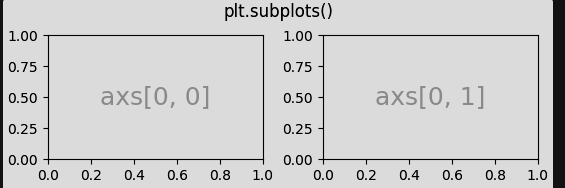

## Comparacion entre ambas Interfaces

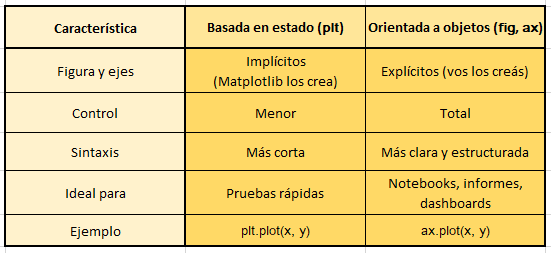

# 3 El ciclo básico de un gráfico


### 3.1 Pyplot (basada en estado)
Algunas funciones básicas

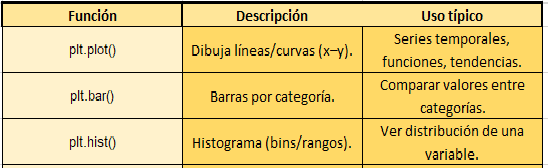


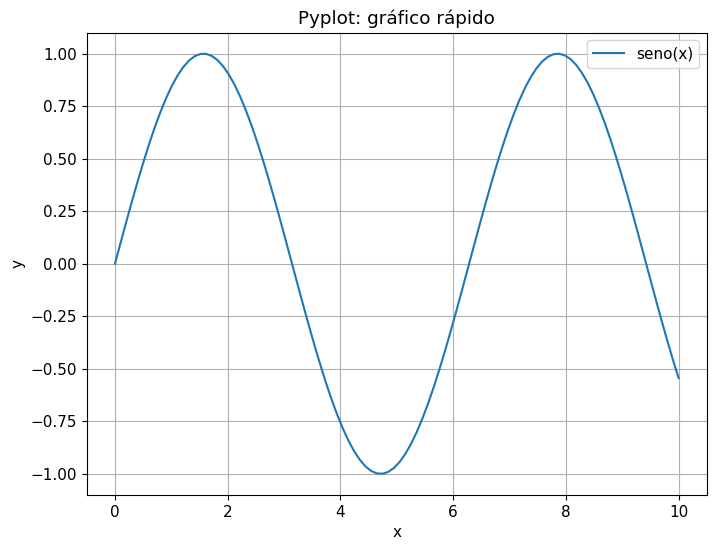

In [ ]:
# Generamos los datos para graficar (pyplot)
x = np.linspace(0, 10, 100)   # 100 valores equiespaciados entre 0 y 10
y = np.sin(x)                 # seno de cada x

plt.plot(x, y, label="seno(x)")   # curva del seno
plt.title("Pyplot: gráfico rápido")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()                      # muestra/“cierra” la figura actual


Sobre plt.show(): se usa tanto en la interfaz basada en estado como en la OO API.

• En notebooks: no siempre obligatorio, pero recomendable para separar figuras.

• En scripts (.py): obligatorio para que el gráfico se muestre.

### 3.2 API orientada a objetos

Todo lo que antes se hacia con plt. ahora se aplica a un eje específico (ax.).
Eso da control total, permitiendo tener varios ejes en una figura y operar en cada uno sin mezclar configuraciones.

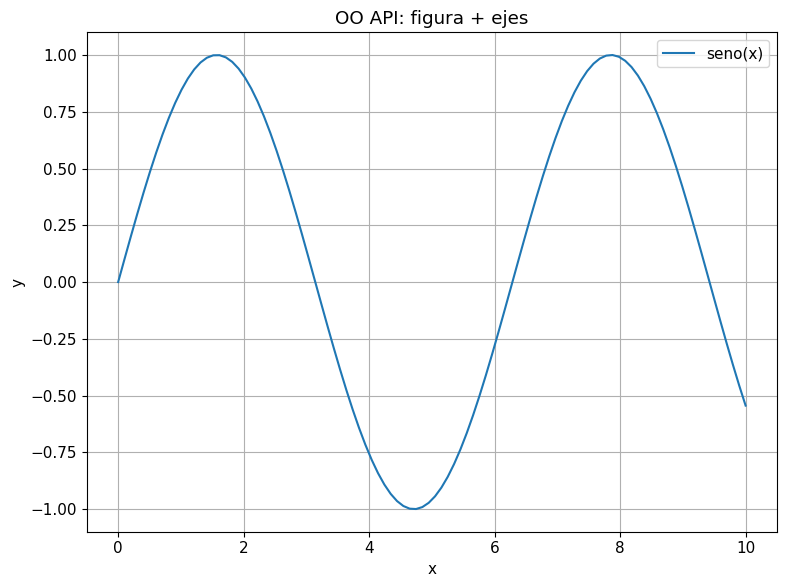

In [ ]:
fig, ax = plt.subplots()            # Crea una figura y un eje
ax.plot(x, y, label="seno(x)")       # Dibuja en el eje ax
ax.set_title("OO API: figura + ejes")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()  #que tenga una leyenda
fig.tight_layout()                  # Ajusta márgenes automáticamente
plt.show()

Cada Axes (variable ax) tiene sus propios métodos equivalentes, por ejemplo:

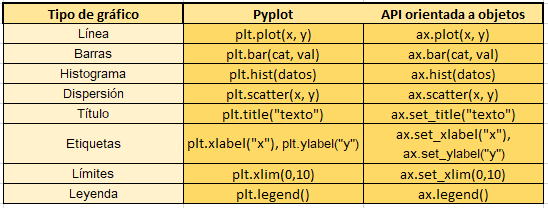

## 4) Estilos y paletas rápidas

Matplotlib permite aplicar temas de estilo predefinidos y paletas de color para mejorar la estética de los gráficos sin necesidad de modificar cada parámetro.


**Aplicamos un estilo**
```
plt.style.use('ggplot')
```



### 4.1 Usar estilos predefinidos (plt.style.use)

In [ ]:
# Lista de estilos disponibles
print(plt.style.available[:10])  # mostramos los primeros 10

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot']


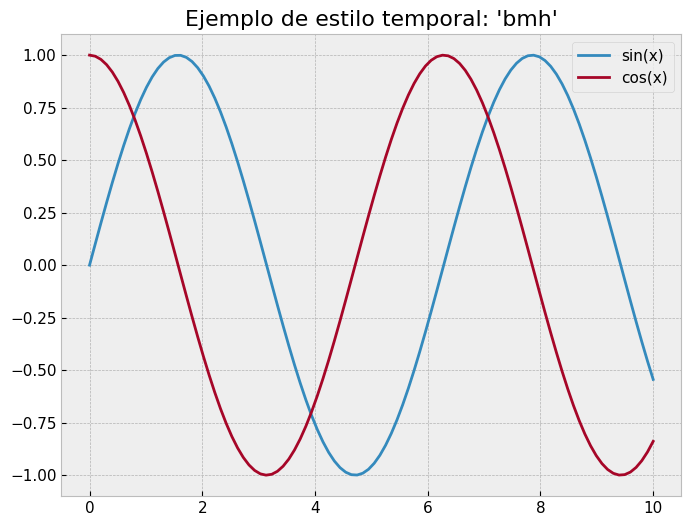

In [ ]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

#Aplicamos un estilo
#plt.style.use('ggplot') fig,
#ax = plt.subplots()
#ax.plot(x, y1, label='sin(x)')
#ax.plot(x, y2, label='cos(x)')
#ax.set_title("Ejemplo de estilo, 'ggplot'")
#ax.legend() plt.show()

# Aplicamos el estilo solo dentro del bloque
with plt.style.context('bmh'):
    fig, ax = plt.subplots()
    ax.plot(x, y1, label='sin(x)')
    ax.plot(x, y2, label='cos(x)')
    ax.set_title("Ejemplo de estilo temporal: 'bmh'")
    ax.legend()
    plt.show()

### Probamos algunos estilos

###

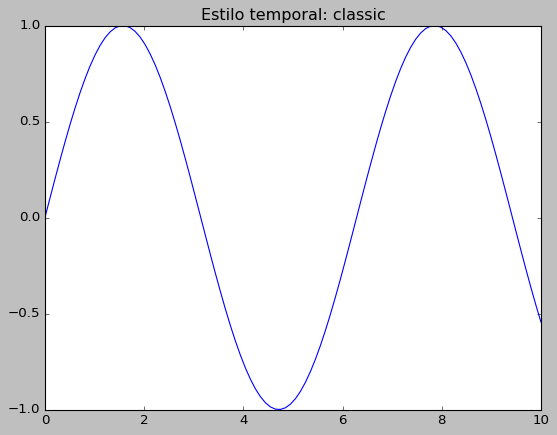

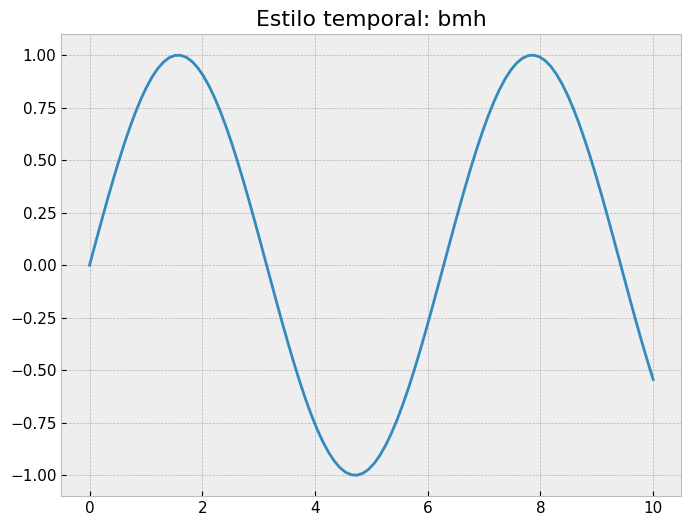

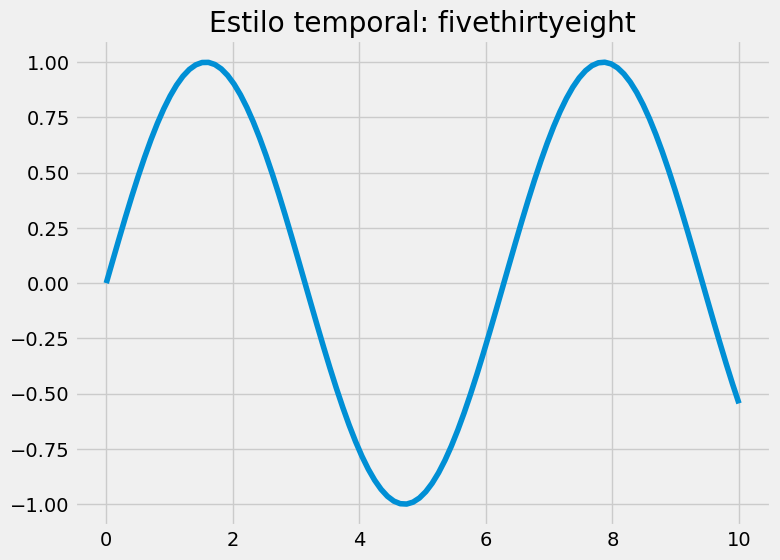

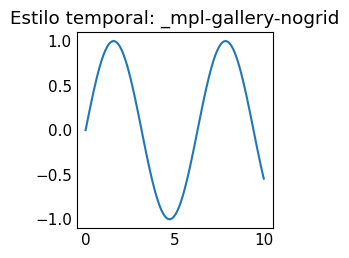

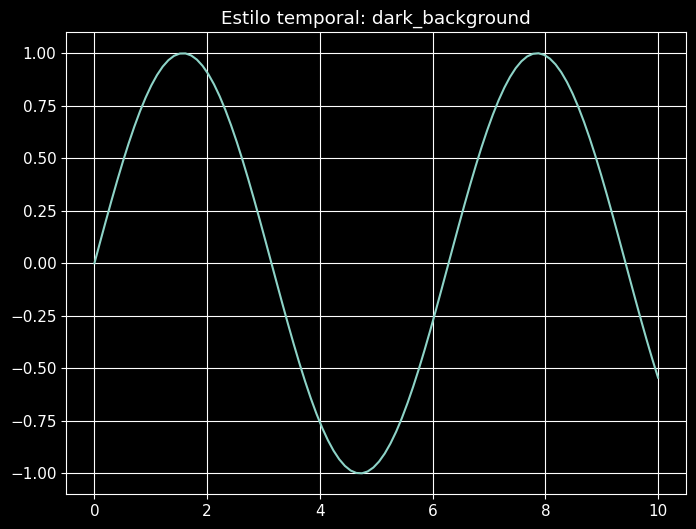

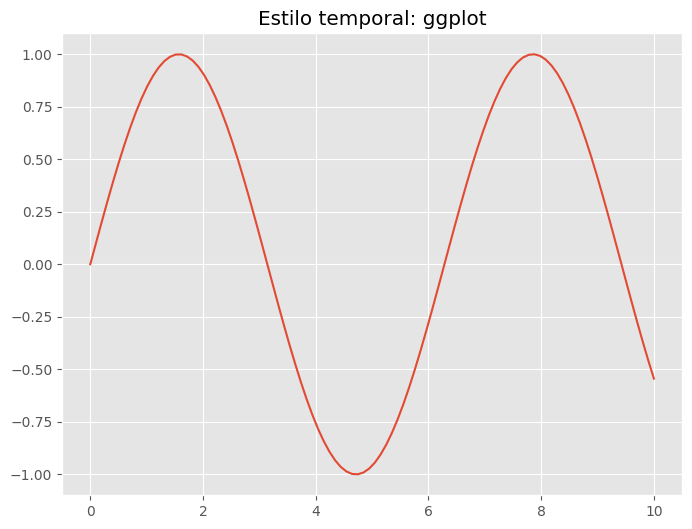

In [ ]:
estilos = ['classic', 'bmh', 'fivethirtyeight', '_mpl-gallery-nogrid', 'dark_background', 'ggplot']

for estilo in estilos:
    with plt.style.context(estilo):
        fig, ax = plt.subplots()
        ax.plot(np.linspace(0, 10, 100), np.sin(np.linspace(0, 10, 100)))
        ax.set_title(f"Estilo temporal: {estilo}")
        plt.show()


### 4.2 Cambiar la paleta de colores de una figura
Cada estilo usa una paleta de colores distinta, pero también se pueden asignar colores manualmente:

Colores aceptados:

* Por nombre ('red', 'green', 'skyblue', etc.)

* Por código hexadecimal ('#FF5733')

* Por notación RGB ((0.2, 0.5, 0.8) → valores entre 0 y 1)

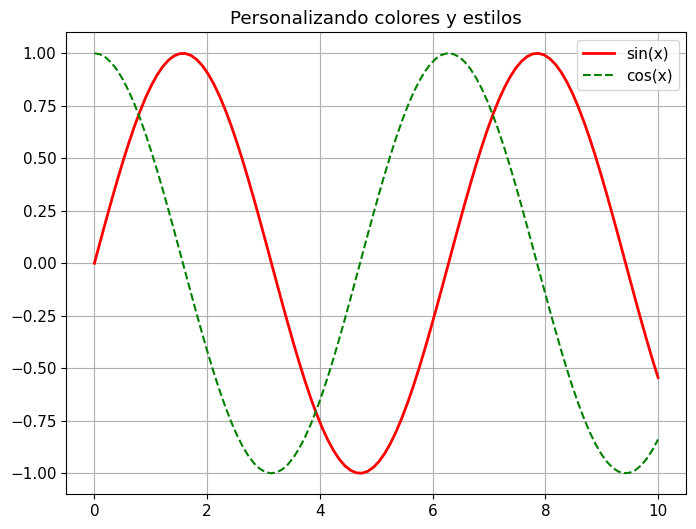

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y1, color='red', linewidth=2, label='sin(x)') #personalizado de colores
ax.plot(x, y2, color='green', linestyle='--', label='cos(x)')
ax.set_title("Personalizando colores y estilos")
ax.legend()
plt.show()


### 4.3 Mapas de color (colormaps)

Los colormaps son escalas continuas de color, muy útiles para gráficos de densidad, mapas de calor o dispersión.

Algunos colormaps comunes:

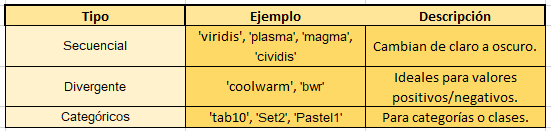

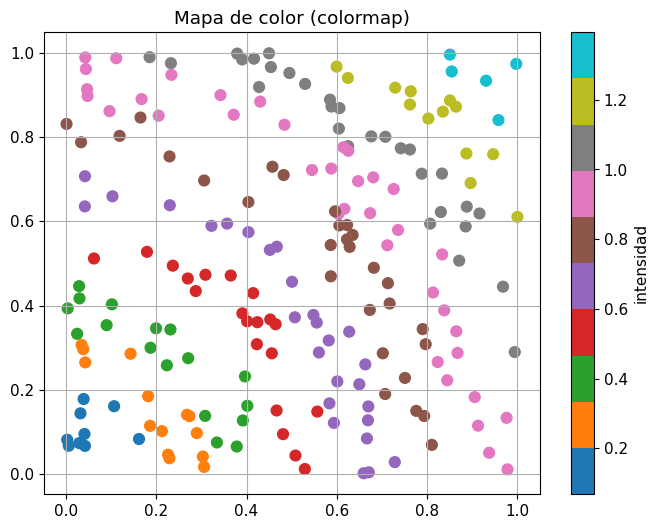

In [ ]:
x = np.random.rand(200)
y = np.random.rand(200)
color = np.sqrt(x**2 + y**2)   # asignar color distinto según la lejos del origen

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=color, cmap='tab10', s=60) #Mapa de colores
ax.set_title("Mapa de color (colormap)")
fig.colorbar(scatter, ax=ax, label='intensidad')
plt.show()


## 5) Límites, etiquetas, títulos, leyendas, lineas
Los detalles visuales de un gráfico (títulos, ejes, leyendas, límites) son los quehacen a un gráfico claro y permiten una visualizaciñon comprensible.

### 5.1 Límites de los ejes (set_xlim, set_ylim)

Por defecto, Matplotlib ajusta automáticamente los límites de los ejes en función de los datos.
En muchos casos conviene fijarlos manualmente para mantener proporciones o comparar entre figuras.

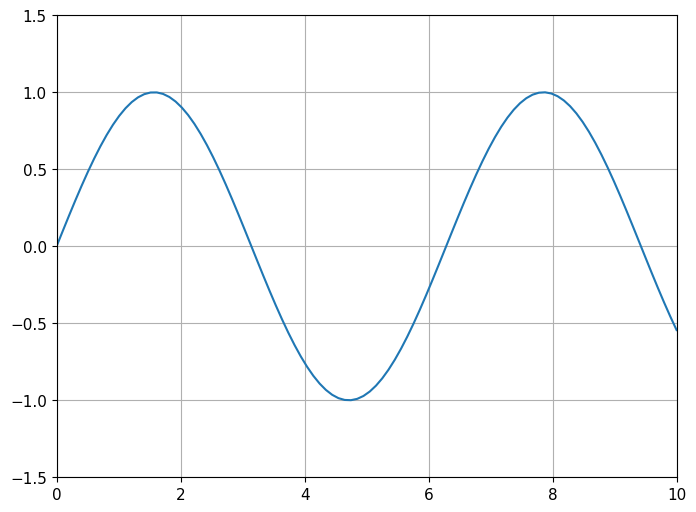

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)")

# Fijamos los límites manualmente
ax.set_xlim(0, 10)       # eje X de 0 a 10
ax.set_ylim(-1.5, 1.5)   # eje Y de -1.5 a 1.5

plt.show()

Funcion equivalentes en pyplot

(-1.5, 1.5)

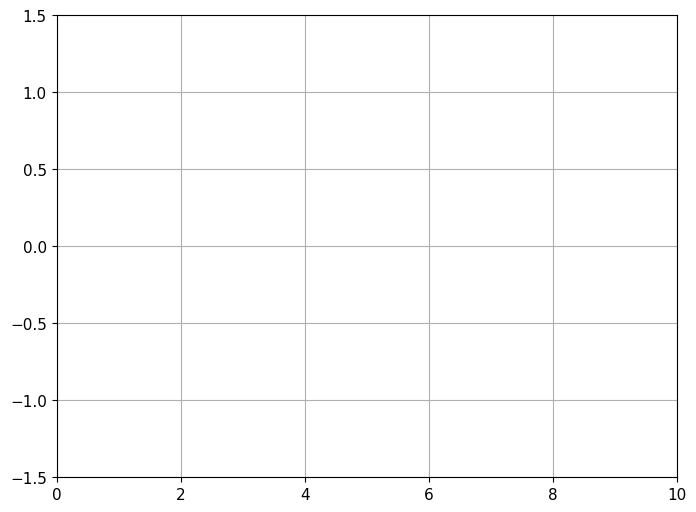

In [ ]:
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)


### 5.2 Etiquetas de los ejes (set_xlabel, set_ylabel)

Las etiquetas indican qué representa cada eje

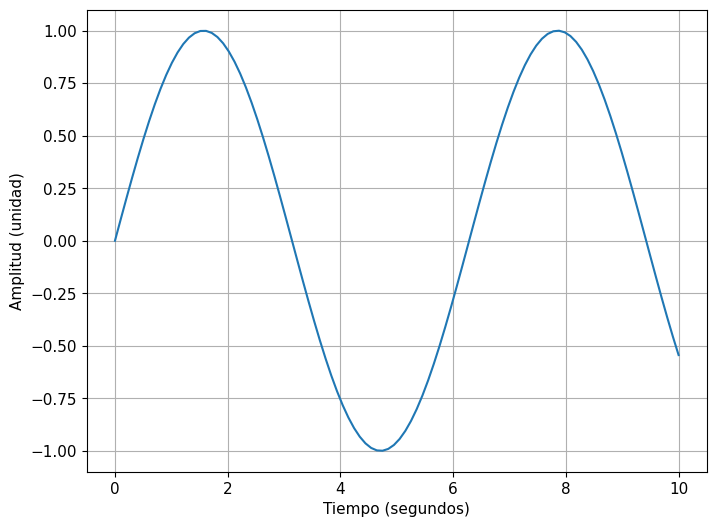

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel("Tiempo (segundos)")
ax.set_ylabel("Amplitud (unidad)")
plt.show()


En la interfaz pyplot sería:

Text(0, 0.5, 'Amplitud (unidad)')

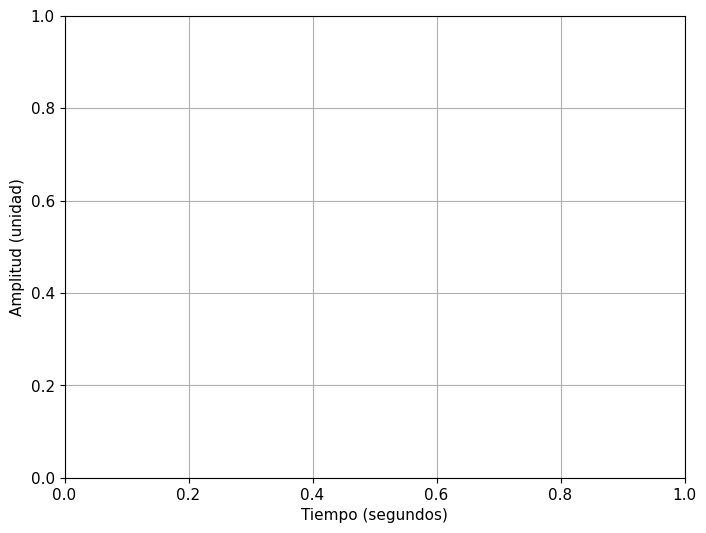

In [ ]:
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud (unidad)")


### 5.3 Títulos (set_title)

Parámetros útiles:

* fontsize → tamaño de letra

* color → color del texto

* pad → separación respecto al gráfico

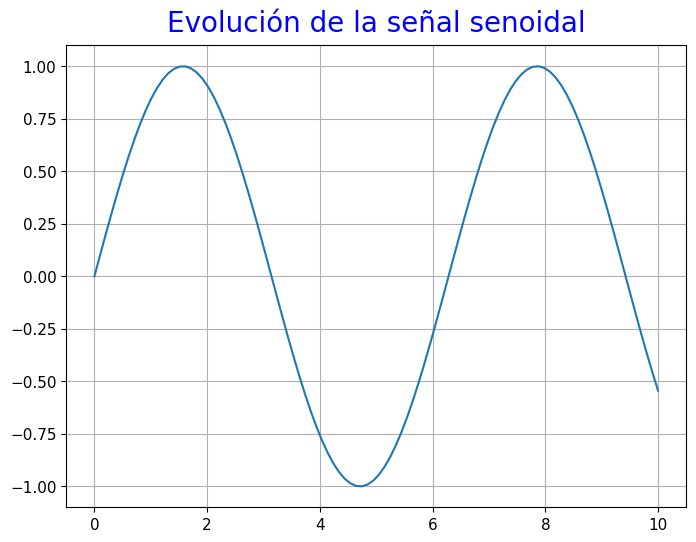

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Evolución de la señal senoidal", fontsize=20, color="blue", pad=10)
plt.show()


### 5.4 Leyendas (legend)

Las leyendas identifican cada serie o conjunto de datos dentro del gráfico.
Para que se muestren, cada línea o elemento debe tener una etiqueta (label) definida.

Parámetro loc → posición de la leyenda:
'upper left', 'upper right', 'lower left', 'lower right', 'center', 'best'

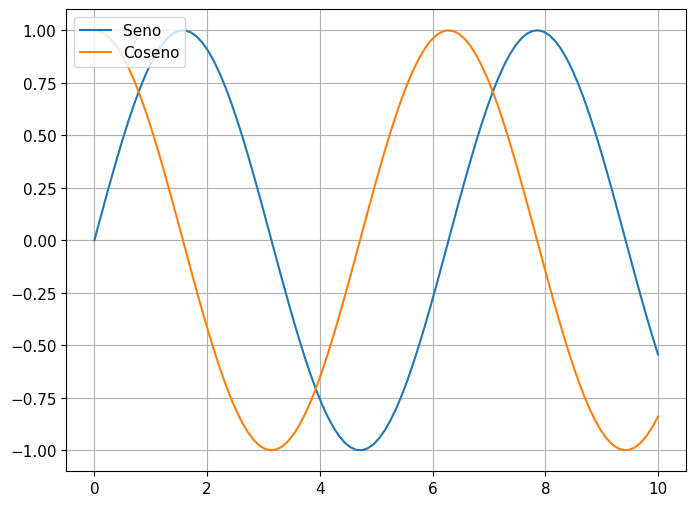

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label="Seno")
ax.plot(x, np.cos(x), label="Coseno")
ax.legend(loc="upper left") #posición de la leyenda
plt.show()


### 5.5 Títulos y etiquetas en subplots

Cuando hay varias visualizaciones en una misma figura, cada eje puede tener su propio título y etiquetas.

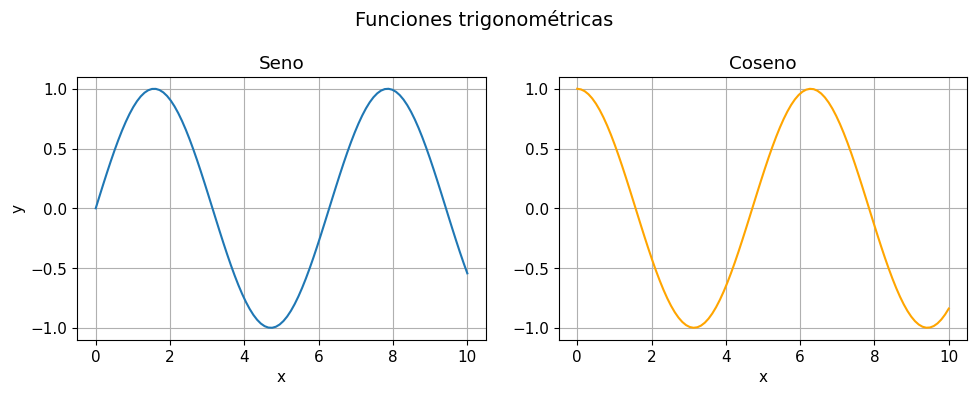

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#grafico Seno
axes[0].plot(x, np.sin(x)) #Dibuja una curva de línea
axes[0].set_title("Seno")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

#grafico coseno
axes[1].plot(x, np.cos(x), color="orange") #Dibuja una curva de línea
axes[1].set_title("Coseno")
axes[1].set_xlabel("x")

fig.suptitle("Funciones trigonométricas", fontsize=14)
fig.tight_layout()
plt.show()


### 5.6 Lineas PLOT
Si queremos crear una sola figura con múltiples líneas (ver la siguiente figura), podemos simplemente llamar a la función plot varias veces:

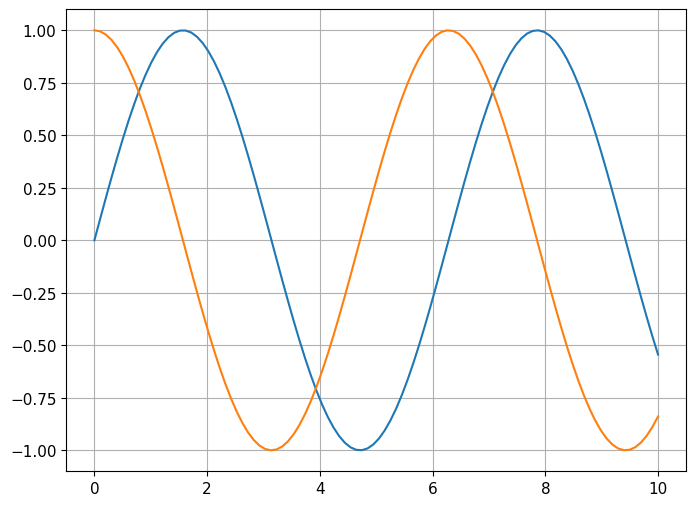

In [ ]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Usando linestyle se puede cambiar el formato de la linea:

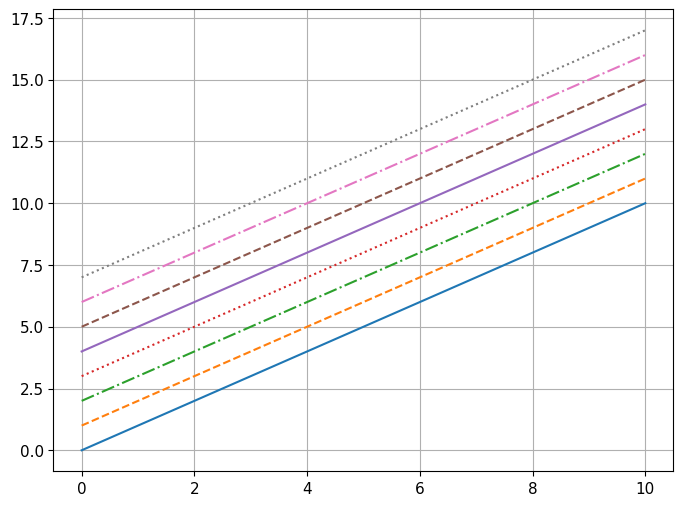

In [ ]:
plt.plot(x, x + 0, linestyle='solid')    # línea sólida
plt.plot(x, x + 1, linestyle='dashed')   # línea punteada
plt.plot(x, x + 2, linestyle='dashdot')  # línea de guion punto
plt.plot(x, x + 3, linestyle='dotted');  # línea de puntos

# de manera mas corta se pueden usar estos codigos:
plt.plot(x, x + 4, linestyle='-')      # sólida
plt.plot(x, x + 5, linestyle='--')     # punteada
plt.plot(x, x + 6, linestyle='-.')     # guion punto
plt.plot(x, x + 7, linestyle=':');      # puntos

linestyle y color se pueden concatenar para indicar el estilo

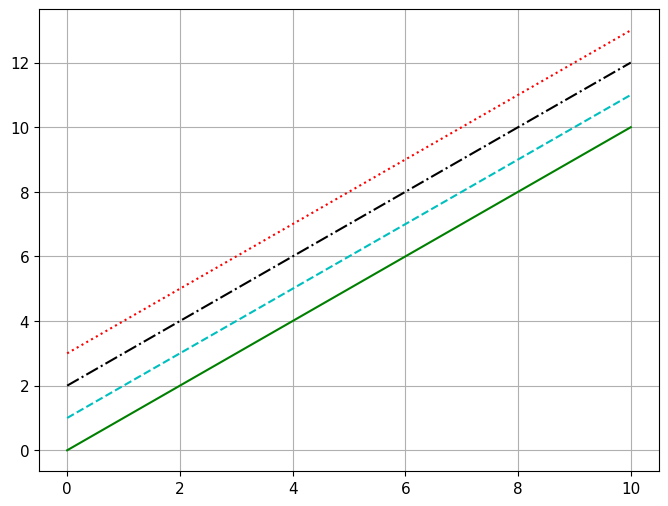

In [ ]:
plt.plot(x, x + 0, '-g')   # línea sólida verde
plt.plot(x, x + 1, '--c')  # línea punteada cian
plt.plot(x, x + 2, '-.k')  # línea de guion punto negra
plt.plot(x, x + 3, ':r');   # línea de puntos roja

## 6) Tipos de gráficos esenciales


### 6.1 Gráfico de líneas (plot)

Ideal para mostrar la evolución de una variable, permite visualizar tendencias, patrones o periodicidades.

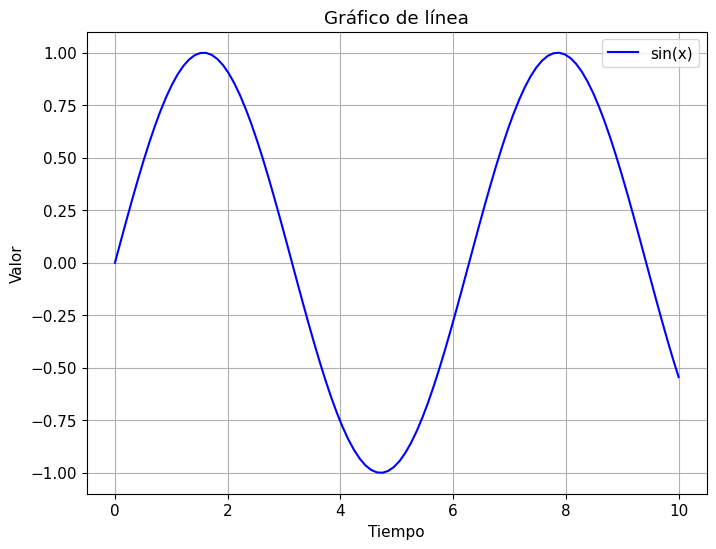

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)", color="blue") #Tipo de grafico (PLOT)
ax.set_title("Gráfico de línea")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Valor")
ax.legend()
plt.show()


### 6.2 Gráfico de dispersión (scatter)

Permite la visualizacion de la relación entre dos variables numéricas. Es común utilizarlo para:

* Analizar correlaciones (por ejemplo, altura vs. peso).

* Detectar agrupamientos o outliers.


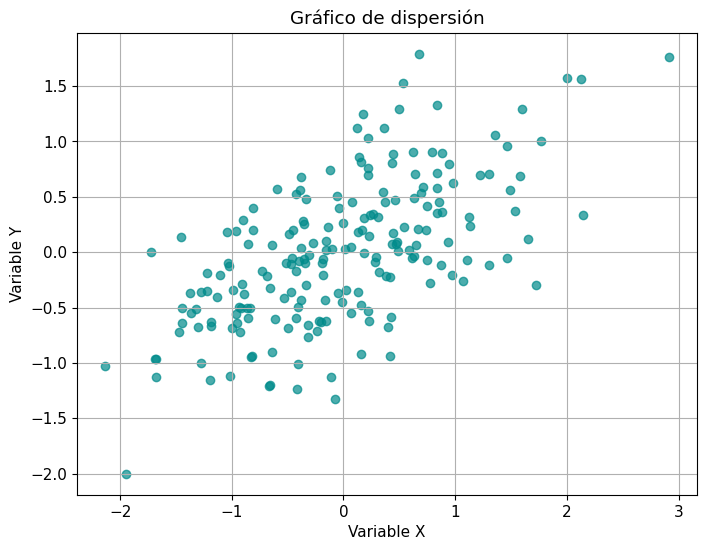

In [ ]:
rng = np.random.default_rng(42)
x = rng.normal(0, 1, 200)
y = 0.5 * x + rng.normal(0, 0.5, 200)

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7, color="darkcyan")
ax.set_title("Gráfico de dispersión")
ax.set_xlabel("Variable X")
ax.set_ylabel("Variable Y")
plt.show()



### 6.3 Gráfico de barras (bar)

Permite comparar valores entre categorías discretas (productos, regiones, géneros, etc.).

Variantes:

ax.barh() → barras horizontales.

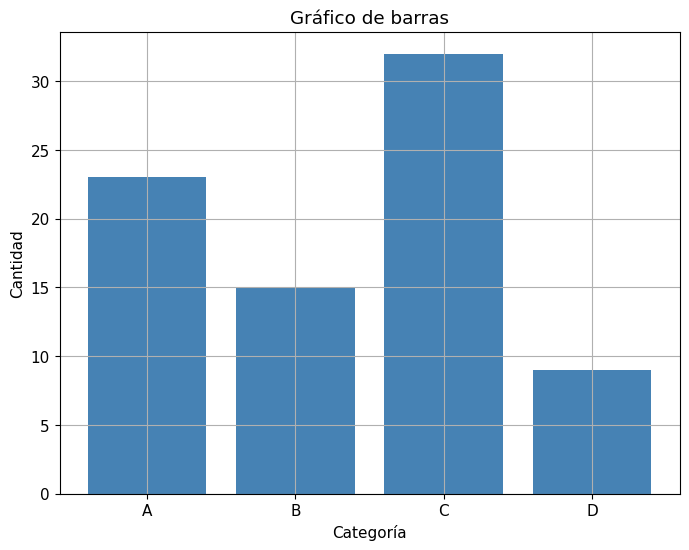

In [ ]:
categorias = ["A", "B", "C", "D"]
valores = [23, 15, 32, 9]

fig, ax = plt.subplots()
ax.bar(categorias, valores, color="steelblue")
ax.set_title("Gráfico de barras")
ax.set_xlabel("Categoría")
ax.set_ylabel("Cantidad")
plt.show()


## 6.4 Histograma (hist)

Muestra la distribución de una variable numérica dividiendo los valores en rangos (bins).
Sirve para entender la forma, dispersión y sesgo de los datos.

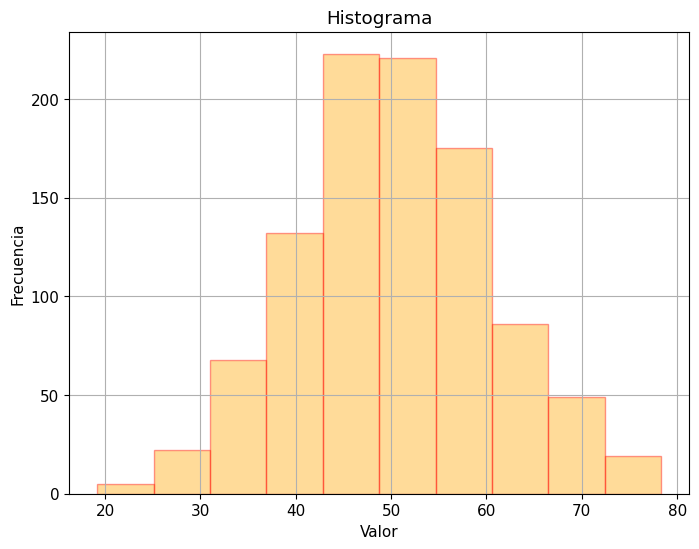

In [ ]:
datos = np.random.normal(50, 10, 1000)

fig, ax = plt.subplots()
ax.hist(datos, bins=10, color="orange", alpha=0.4, edgecolor="red")
ax.set_title("Histograma")
ax.set_xlabel("Valor")
ax.set_ylabel("Frecuencia")
plt.show()


### 6.5 Gráfico de caja (boxplot)
Resume la distribución mostrando mediana, cuartiles y posibles outliers.
Ideal para comparar distribuciones entre grupos.

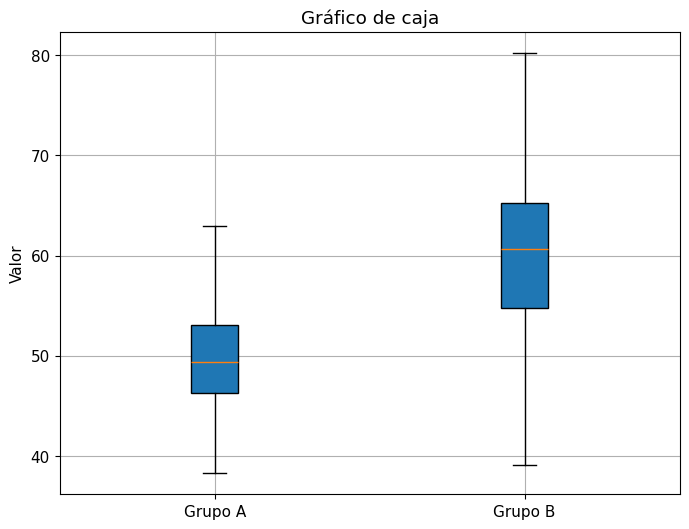

In [ ]:
grupos = [np.random.normal(50, 5, 100), np.random.normal(60, 8, 100)]
fig, ax = plt.subplots()
ax.boxplot(grupos, tick_labels=["Grupo A", "Grupo B"], patch_artist=True)
ax.set_title("Gráfico de caja")
ax.set_ylabel("Valor")
plt.show()


## 8) Anotaciones, líneas de referencia y formato de ejes

Las anotaciones y líneas de referencia ayudan a destacar puntos clave o valores importantes.

### 8.1 Líneas de referencia (ax.axhline, ax.axvline)

Se usan para marcar niveles fijos o puntos de interés en el eje.

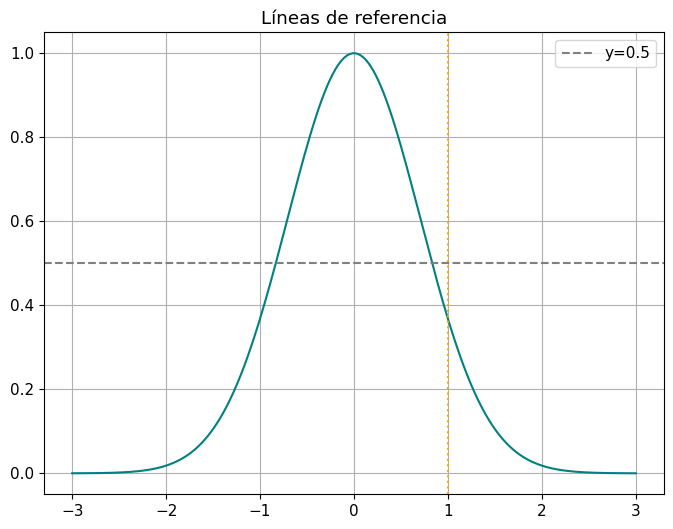

In [ ]:
x = np.linspace(-3, 3, 200)
y = np.exp(-x**2)

fig, ax = plt.subplots()
ax.plot(x, y, color="teal")
ax.axhline(0.5, color="gray", linestyle="--", label="y=0.5") # Linea de ref1
ax.axvline(1.0, color="orange", linestyle=":") # Linea de ref2
ax.legend()
ax.set_title("Líneas de referencia")
plt.show()


### 8.2 Anotaciones (ax.annotate)

Permiten resaltar un punto específico y agregar texto explicativo.

Parámetros útiles:

* xy → punto a señalar.

* xytext → posición del texto.

* arrowprops → estilo de la flecha.

* fontsize, color → formato del texto.

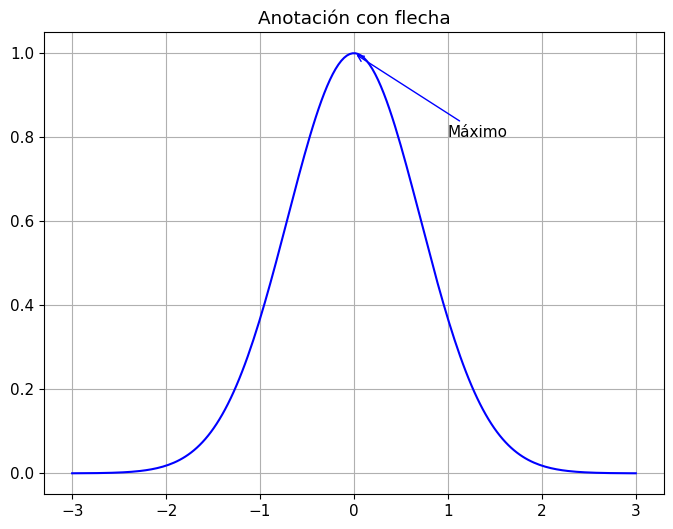

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color="blue")
ax.annotate( #Anotaciones
    "Máximo",
    xy=(0, 1), xytext=(1, 0.8), #Posicion de punto y texto
    arrowprops=dict(arrowstyle="->", color="blue"), #Flecha
    fontsize=11
)
ax.set_title("Anotación con flecha")
plt.show()


### 8.3 Formato de ticks (marcas de eje)

Las marcas de los ejes (ticks) indican valores y se pueden personalizar para mayor claridad.

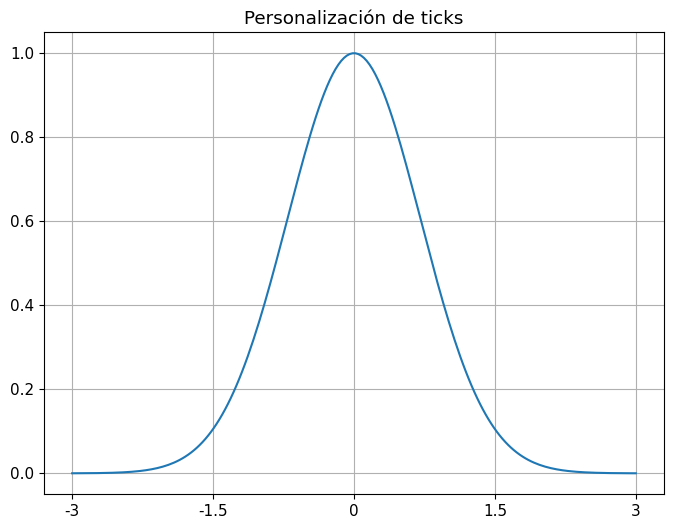

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xticks([-3, -1.5, 0, 1.5, 3]) #Define posiciones numéricas
ax.set_xticklabels(["-3", "-1.5", "0", "1.5", "3"]) #texto o etiqueta a mostrar en cada tick.
ax.set_title("Personalización de ticks")
plt.show()


## 9) Subplots: múltiples gráficos en una figura

A veces necesitamos mostrar varias visualizaciones relacionadas dentro de una misma figura (por ejemplo, comparar dos series, o mostrar diferentes vistas del mismo fenómeno).
Para eso usamos subplots, que dividen la figura en una cuadrícula de ejes (Axes)

### 9.1 Crear subplots con plt.subplots()

La función plt.subplots(filas, columnas) crea una figura con varios ejes organizados en grilla.

Partes:

* fig → figura contenedora.

* axes → lista o array de ejes (axes[0], axes[1], etc.).

* figsize → controla el tamaño total de la figura (en pulgadas).

* tight_layout() → ajusta márgenes automáticamente.

* suptitle() → título general para toda la figura.

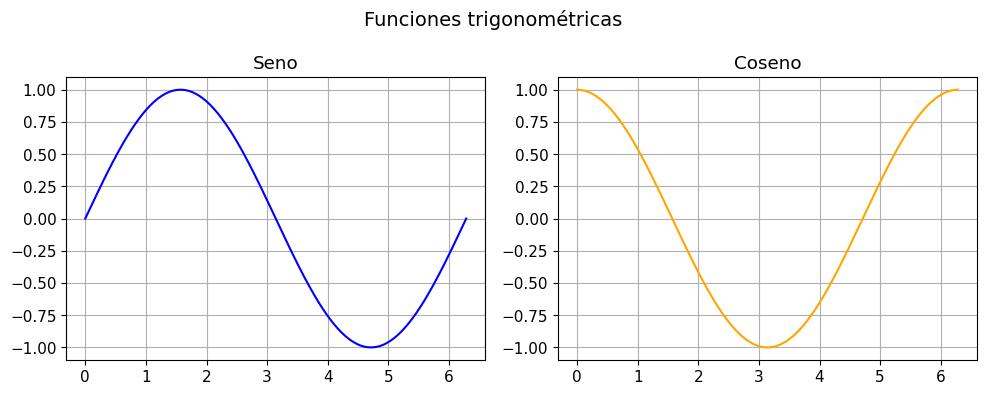

In [ ]:
x = np.linspace(0, 2*np.pi, 200)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 fila, 2 columnas

#grafico 1
axes[0].plot(x, np.sin(x), color="blue")
axes[0].set_title("Seno")

#grafico 2
axes[1].plot(x, np.cos(x), color="orange")
axes[1].set_title("Coseno")

fig.suptitle("Funciones trigonométricas", fontsize=14) #título general
fig.tight_layout() #márgenes
plt.show()


## 9.2 Estructuras más complejas (grillas)

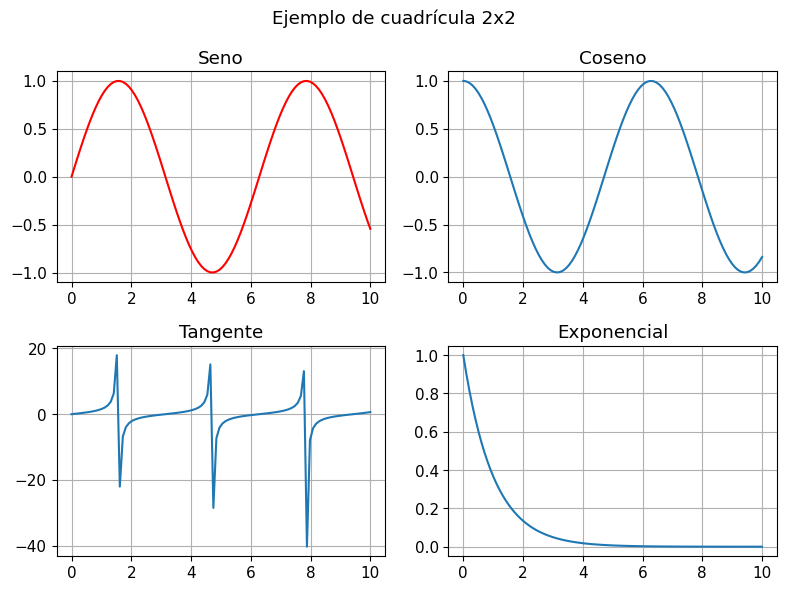

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 2 filas, 2 columnas

x = np.linspace(0, 10, 100)
axes[0, 0].plot(x, np.sin(x), color="red");    axes[0, 0].set_title("Seno")
axes[0, 1].plot(x, np.cos(x));    axes[0, 1].set_title("Coseno")
axes[1, 0].plot(x, np.tan(x));    axes[1, 0].set_title("Tangente")
axes[1, 1].plot(x, np.exp(-x));   axes[1, 1].set_title("Exponencial")

fig.suptitle("Ejemplo de cuadrícula 2x2")
fig.tight_layout()
plt.show()
